In [6]:
import psycopg2
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
from plotly.offline import plot 
import plotly.graph_objects as go
import warnings
import datetime
warnings.filterwarnings('ignore')

# import q_credentials.db_secmaster_cloud_cred as db_secmaster_cred
import q_credentials.db_secmaster_cred as db_secmaster_cred
import q_credentials.db_indicator_cred as db_indicator_cred


In [7]:
# connect to our securities_master database
conn_secmaster = psycopg2.connect(host=db_secmaster_cred.dbHost , database=db_secmaster_cred.dbName, user=db_secmaster_cred.dbUser, password=db_secmaster_cred.dbPWD)

In [8]:
conn_indicator = psycopg2.connect(host=db_indicator_cred.dbHost , database=db_indicator_cred.dbName, user=db_indicator_cred.dbUser, password=db_indicator_cred.dbPWD)

In [ ]:
sql="""SELECT s.ticker, max(d.stock_id), max(d.date_price)
FROM public.symbol s inner join daily_data d on s.id= d.stock_id
group by s.ticker"""
df_ticker_last_day=pd.read_sql(sql,con=conn_secmaster)

In [14]:
sql="""SELECT date_price, close_price from minute_data where stock_id=17537"""
df=pd.read_sql(sql,con=conn_secmaster)
df.set_index('date_price',inplace=True)

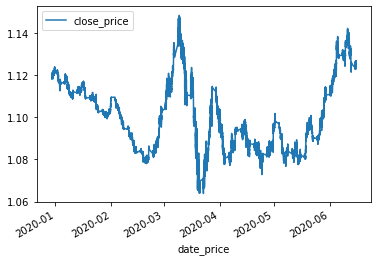

In [16]:
df.plot()

In [5]:
df_ticker_last_day

,ticker,max,max
0,VRSN,6005,2020-05-14
1,NUE,7386,2020-05-14
2,HRB,7370,2020-05-14
3,GRMN,7384,2020-05-14
4,CTSH,3879,2020-05-14
...,...,...,...
459,LUV,6629,2020-05-14
460,BLL,2690,2020-05-14
461,FIS,2399,2020-05-14
462,CMG,8285,2020-05-14


In [18]:
# sql="""select date_price as date, open_price as open, high_price as high, low_price as low , close_price as close,volume from daily_data where stock_id=71"""
# df_stock=pd.read_sql(sql,con=conn_secmaster)

In [19]:
# import datetime

In [20]:
sql="select * from indicator"
ind_list=list(pd.read_sql(sql,con=conn_indicator)['name'])
ind_list

['candle_1', 'candle_2', 'candle_3', 'level', 'anomaly']

In [21]:
symbol_id='AAPL'#'BOM500114'
start_date=datetime.datetime(2018,1,1).strftime("%Y-%m-%d")
indicator_name = 'candle_1'

In [22]:
sql="select d.date_price as date, open_price as open, high_price as high, low_price as low , close_price as close,volume from daily_data d join symbol s on d.stock_id = s.id where s.ticker='%s' and d.date_price > '%s'" %(symbol_id, start_date)
df_price=pd.read_sql(sql,con=conn_secmaster)

In [23]:
sql="select d.date_price as date, d.value from daily_data d join symbol s on d.symbol_id = s.id join indicator i on i.id=d.indicator_id where s.ticker='%s' and i.name = '%s' and d.date_price > '%s'" %(symbol_id, indicator_name, start_date)
df_indicator=pd.read_sql(sql,con=conn_indicator)

In [24]:
df_indicator.set_index('date',inplace=True)

In [39]:
df_indicator.head()

,anomaly_bear,anomaly_body_size,anomaly_body_size_dev,anomaly_body_size_ema,anomaly_bull,anomaly_gap,anomaly_gap_dev,anomaly_gap_ema,anomaly_gap_signal,anomaly_vol_anomaly,anomaly_vol_anomaly_2,anomaly_vol_dev,anomaly_vol_ema,anomaly_wick_bear,anomaly_wick_bear_dev,anomaly_wick_bear_ema,anomaly_wick_bear_signal,anomaly_wick_bull,anomaly_wick_bull_dev,anomaly_wick_bull_ema,anomaly_wick_bull_signal
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.0,2.10,1.267830,0.925995,1.0,0.93,0.008986,0.921717,0.008986,1.204958,0.0,0.049590,2.434848e+07,0.90,0.760427,0.511240,0.760427,0.04,-0.901577,0.406411,0.000000
2018-01-03,1.0,0.30,0.630623,0.812178,0.0,0.27,-0.663854,0.803223,0.000000,0.525592,0.0,0.166551,2.528429e+07,0.27,-0.422309,0.467378,0.000000,2.02,1.886577,0.699791,1.886577
2018-01-04,0.0,0.49,0.349788,0.753600,1.0,0.31,-0.565550,0.713546,0.000000,0.316858,0.0,0.094143,2.476616e+07,0.46,-0.012953,0.466037,0.000000,0.44,-0.325729,0.652556,0.000000
2018-01-05,0.0,1.56,0.732913,0.900218,1.0,0.41,-0.377237,0.658356,0.000000,0.705911,0.0,0.036842,2.456504e+07,0.39,-0.137572,0.452212,0.000000,0.37,-0.384546,0.601182,0.000000
2018-01-08,0.0,0.00,1.000000,0.736542,0.0,-0.65,-0.010408,0.656837,-0.000000,0.862805,0.0,0.137195,2.383827e+07,0.42,-0.059045,0.446355,0.000000,1.26,0.747652,0.720967,0.747652


In [25]:
df_all_ind=pd.DataFrame()
for ind in ind_list:
    print(ind)
    sql="select d.date_price as date, d.value from daily_data d join symbol s on d.symbol_id = s.id join indicator i on i.id=d.indicator_id where s.ticker='%s' and i.name = '%s' and d.date_price > '%s'" %(symbol_id, ind, start_date)
    df_indicator=pd.read_sql(sql,con=conn_indicator)
    df_indicator.set_index('date',inplace=True)
    df_indicator=pd.concat([df_indicator.drop(['value'], axis=1), df_indicator['value'].apply(pd.Series)], axis=1)
    df_indicator.columns=[ind+"_"+col for col in df_indicator.columns]
    if df_all_ind.empty:
        df_all_ind=pd.merge(left=df_price, right=df_indicator,on='date')
    else:
        df_all_ind=pd.merge(left=df_all_ind, right=df_indicator,on='date')

candle_1
candle_2
candle_3
level
anomaly


In [40]:
df_all_ind.head()

,date,open,high,low,close,volume,candle_1_level,candle_1_pattern_name,candle_2_level,candle_2_pattern_name,candle_3_level,candle_3_pattern_name,level_level,level_nearest_support_atr_range,level_nearest_support_duration,level_nearest_support_range,level_support,level_nearest_resistance_atr_range,level_nearest_resistance_duration,level_nearest_resistance_range,level_resistance,anomaly_bear,anomaly_body_size,anomaly_body_size_dev,anomaly_body_size_ema,anomaly_bull,anomaly_gap,anomaly_gap_dev,anomaly_gap_ema,anomaly_gap_signal,anomaly_vol_anomaly,anomaly_vol_anomaly_2,anomaly_vol_dev,anomaly_vol_ema,anomaly_wick_bear,anomaly_wick_bear_dev,anomaly_wick_bear_ema,anomaly_wick_bear_signal,anomaly_wick_bull,anomaly_wick_bull_dev,anomaly_wick_bull_ema,anomaly_wick_bull_signal
0,2018-01-02,170.16,172.30,169.26,172.26,25555934,10.0,long,0.0,,0.0,,0.0,2.131653,61.0,"[165.28, 169.48]","[[165.28, 169.48, 2017-11-02 00:00:00, True], ...",0.672694,13.0,"[174.35, 173.25]","[[174.35, 173.25, 2017-12-20 00:00:00, False],...",0.0,2.10,1.267830,0.925995,1.0,0.93,0.008986,0.921717,0.008986,1.204958,0.0,0.049590,2.434848e+07,0.90,0.760427,0.511240,0.760427,0.04,-0.901577,0.406411,0.000000
1,2018-01-03,172.53,174.55,171.96,172.23,29495399,5.0,DOJI_SPINOFF,0.0,,0.0,,0.0,2.064320,62.0,"[165.28, 169.48]","[[165.28, 169.48, 2017-11-02 00:00:00, True], ...",0.668244,14.0,"[174.35, 173.25]","[[174.35, 173.25, 2017-12-20 00:00:00, False],...",1.0,0.30,0.630623,0.812178,0.0,0.27,-0.663854,0.803223,0.000000,0.525592,0.0,0.166551,2.528429e+07,0.27,-0.422309,0.467378,0.000000,2.02,1.886577,0.699791,1.886577
2,2018-01-04,172.54,173.47,172.08,173.03,22434597,0.0,,0.0,,0.0,,0.0,2.618706,63.0,"[165.28, 169.48]","[[165.28, 169.48, 2017-11-02 00:00:00, True], ...",0.356886,15.0,"[174.35, 173.25]","[[174.35, 173.25, 2017-12-20 00:00:00, False],...",0.0,0.49,0.349788,0.753600,1.0,0.31,-0.565550,0.713546,0.000000,0.316858,0.0,0.094143,2.476616e+07,0.46,-0.012953,0.466037,0.000000,0.44,-0.325729,0.652556,0.000000
3,2018-01-05,173.44,175.37,173.05,175.00,23660018,0.0,,0.0,,0.0,,0.0,3.473040,64.0,"[165.28, 169.48]","[[165.28, 169.48, 2017-11-02 00:00:00, True], ...",0.234726,15.0,"[176.02, 175.01]","[[176.02, 175.01, 2017-12-21 00:00:00, True], ...",0.0,1.56,0.732913,0.900218,1.0,0.41,-0.377237,0.658356,0.000000,0.705911,0.0,0.036842,2.456504e+07,0.39,-0.137572,0.452212,0.000000,0.37,-0.384546,0.601182,0.000000
4,2018-01-08,174.35,175.61,173.93,174.35,20567766,1.0,DOJI,-2.0,BEARISH HARAMI CROSS,0.0,,0.0,3.332960,67.0,"[165.28, 169.48]","[[165.28, 169.48, 2017-11-02 00:00:00, True], ...",0.557087,18.0,"[176.02, 175.01]","[[176.02, 175.01, 2017-12-21 00:00:00, True], ...",0.0,0.00,1.000000,0.736542,0.0,-0.65,-0.010408,0.656837,-0.000000,0.862805,0.0,0.137195,2.383827e+07,0.42,-0.059045,0.446355,0.000000,1.26,0.747652,0.720967,0.747652


In [26]:
pd.options.display.max_columns = None

In [27]:
def level_plot(df):
    support_ls = [[ls[0],ls[1],datetime.datetime.strptime(ls[2],'%Y-%m-%d %H:%M:%S'),ls[3]] for ls in df.iloc[-1]['level_support']]
    resistance_ls = [[ls[0],ls[1],datetime.datetime.strptime(ls[2],'%Y-%m-%d %H:%M:%S'),ls[3]] for ls in df.iloc[-1]['level_resistance']]
    end_dt=df.index[-1]
    res_plot_ls=[]
    sup_plot_ls=[]
    for res in resistance_ls[:5]:
        res_plot_ls.append(dict(x0=res[2],x1=end_dt,y0=res[0],y1=res[1],yref='y1',opacity=.2,fillcolor='Red',line=dict(color="black",width=1)))
    for sup in support_ls[:5]:
        sup_plot_ls.append(dict(x0=sup[2],x1=end_dt,y0=sup[0],y1=sup[1],yref='y1',opacity=.2,fillcolor='green',line=dict(color="black",width=1)))
    return (res_plot_ls+sup_plot_ls)

In [28]:
# df.columns

In [31]:
# candle1_plot_ls=[]
# for i,row in df.tail(10).iterrows():
#     if(row['candle_1_pattern_name']):
# #         print(row['candle_1_pattern_name'])
#         print(pd.to_datetime(i), (i+datetime.timedelta(days=1)))
#         candle1_plot_ls.append(dict(x0=i,x1=(i+datetime.timedelta(days=2)),y0=row['high'],y1=row['low'],yref='y1',opacity=.2,fillcolor='blue',line=dict(color="black",width=1)))

In [32]:
df=df_all_ind.set_index('date')
interested_feature='anomaly_vol_anomaly'

In [33]:
df_candle_1=df[-10:]
df_candle_1=df_candle_1[df_candle_1['candle_1_pattern_name']!='']
df_candle_1['pattern']='1'

df_candle_2=df[-10:]
df_candle_2=df_candle_2[df_candle_2['candle_2_pattern_name']!='']
df_candle_2['pattern']='2'

df_candle_3=df[-10:]
df_candle_3=df_candle_3[df_candle_3['candle_3_pattern_name']!='']
df_candle_3['pattern']='3'

In [34]:
# Plotting
data = [ dict(
    type = 'candlestick',
    open = df.open,
    high = df.high,
    low = df.low,
    close = df.close,
    x = df.index,
    yaxis = 'y1',
    name = 'price'
)]


data.append( dict( x=df.index, y=df.volume,                         
                         marker=dict( color='blue' ),
                         type='bar', yaxis='y2', name='Volume'))

data.append( dict( x=df.index, y=df[interested_feature],                         
                         marker=dict( color='red' ),
                         type='scatter', yaxis='y3', name=interested_feature))

data.append( dict( x=df_candle_1.index, y=df_candle_1['high'],
                         text=df_candle_1['pattern'],
                         mode="markers+text",textfont_size=15,textposition="top center",
                         marker=dict( color='blue' ),
                         type='scatter', yaxis='y1', name='candle_patter_1'))

data.append( dict( x=df_candle_2.index, y=df_candle_2['high'],
                         text=df_candle_2['pattern'],
                         mode="markers+text",textfont_size=15,textposition="top center",
                         marker=dict( color='red' ),
                         type='scatter', yaxis='y1', name='candle_patter_2'))


data.append( dict( x=df_candle_3.index, y=df_candle_3['high'],
                         text=df_candle_3['pattern'],
                         mode="markers+text",textfont_size=15,textposition="top center",
                         marker=dict( color='red' ),
                         type='scatter', yaxis='y1', name='candle_patter_3'))


layout=dict()    
layout['xaxis'] = dict( rangeslider = dict( visible = False ),autorange=True,fixedrange=False,visible=False,type='category')#type='category',
layout['yaxis'] = dict( domain = [0.2, 1],autorange = True,fixedrange=False)
layout['yaxis2'] = dict( domain = [0.0, 0.1],autorange = True,fixedrange=False)
layout['yaxis3'] = dict( domain = [0.1, 0.2],autorange = True,fixedrange=False)
# layout['shapes'] = [dict(x0=start_dt, x1=end_dt, y0=3057.9, y1=3060.85, yref='y1',opacity=.2,line=dict(color="Red",width=1))]#fillcolor='green',line_width=2
layout['shapes'] = level_plot(df)
# layout['shapes'] = candle1_plot_ls

df.to_csv("stock_price_indicator.csv",index=True)

fig = dict( data=data, layout=layout )

In [35]:
figure=go.FigureWidget(data=data, layout=layout)

In [36]:
def zoom(layout, x_range):
    print(x_range)
    in_view = df.iloc[int(figure.layout.xaxis.range[0]):int(figure.layout.xaxis.range[1])]
    figure.layout.yaxis2.range = [in_view.volume.min(), in_view.volume.max()]
    figure.layout.yaxis3.range = [in_view[interested_feature].min(), in_view[interested_feature].max()]

In [37]:
figure.layout.on_change(zoom, 'xaxis.range')

In [38]:
figure.update_layout(margin=dict(l=20, r=10),paper_bgcolor="LightSteelBlue",width=2200, height=1000)

FigureWidget({
    'data': [{'close': array([172.26, 172.23, 173.03, ..., 247.74, 254.81, 254.29]),
          …